<a href="https://colab.research.google.com/github/Tanishi20079/RapportFoodoo_foodCategorization/blob/main/CGAS_PROJECT_VGG16_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
########################################################################################################################
#_____________________________________________________Import Section___________________________________________ 
########################################################################################################################
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
import cv2
import scipy.io as sio
import ntpath
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications.inception_v3 import InceptionV3

#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import get_file, get_source_inputs
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.models import Model

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = sio.loadmat('/content/drive/MyDrive/SEM3/CGAS/Project/CGAS_FoodCategorization/train_data25.mat')

In [9]:
X = data['X_train']
y = data['y_train']
len(X)

20389

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
train=X_train
test=X_test

In [12]:
np.unique(y_train)

array(['chocolate ', 'cup       ', 'donuts    ', 'dumplings ',
       'french    ', 'fried     ', 'garlic    ', 'gnocchi   ',
       'grilled   ', 'hamburger ', 'hot       ', 'ice       ',
       'macarons  ', 'mussels   ', 'nachos    ', 'pancakes  ',
       'pizza     ', 'red       ', 'samosa    ', 'spring    ',
       'strawberry', 'sushi     ', 'waffles   '], dtype='<U10')

In [13]:
def remove_space(string):
    return string.replace(" ", "")

train_labels = []
for y in y_train:
  train_labels.append(remove_space(y))
y_train = train_labels

np.unique(y_train)

array(['chocolate', 'cup', 'donuts', 'dumplings', 'french', 'fried',
       'garlic', 'gnocchi', 'grilled', 'hamburger', 'hot', 'ice',
       'macarons', 'mussels', 'nachos', 'pancakes', 'pizza', 'red',
       'samosa', 'spring', 'strawberry', 'sushi', 'waffles'], dtype='<U10')

In [14]:
freq_train = {}
for y in y_train:
  if y not in freq_train:
    freq_train[y] = 1

  else:
    freq_train[y] += 1
freq_train
len(freq_train)

23

In [15]:
test_labels = []
for y in y_test:
  test_labels.append(remove_space(y))
y_test = test_labels

np.unique(y_test)

array(['chocolate', 'cup', 'donuts', 'dumplings', 'french', 'fried',
       'garlic', 'gnocchi', 'grilled', 'hamburger', 'hot', 'ice',
       'macarons', 'mussels', 'nachos', 'pancakes', 'pizza', 'red',
       'samosa', 'spring', 'strawberry', 'sushi', 'waffles'], dtype='<U10')

In [16]:
freq_test = {}
for y in y_test:
  if y not in freq_test:
    freq_test[y] = 1

  else:
    freq_test[y] += 1
freq_test

{'chocolate': 342,
 'cup': 206,
 'donuts': 139,
 'dumplings': 195,
 'french': 354,
 'fried': 171,
 'garlic': 154,
 'gnocchi': 184,
 'grilled': 194,
 'hamburger': 143,
 'hot': 172,
 'ice': 173,
 'macarons': 181,
 'mussels': 128,
 'nachos': 163,
 'pancakes': 156,
 'pizza': 143,
 'red': 152,
 'samosa': 173,
 'spring': 113,
 'strawberry': 161,
 'sushi': 133,
 'waffles': 148}

In [17]:
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(y_train)
test_int_encoded = label_encoder.fit_transform(y_test)
int_encoded

array([ 7,  5, 13, ...,  5,  0, 20])

In [18]:
onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
train_encoded = onehot_encoder.fit_transform(int_encoded)
print(train_encoded)
print("test encoded: ")
test_int_encoded = test_int_encoded.reshape(len(test_int_encoded), 1)
test_encoded = onehot_encoder.fit_transform(test_int_encoded)
print(test_encoded)

print(len(train_encoded))
print(len(test_encoded))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
test encoded: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
16311
4078


In [19]:
#import required libraries - we do need the models, flatten, dense, input layers 
import numpy as np 
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [20]:
IMAGE_SIZE = [192, 192] #Default image size for VGG16 

In [21]:
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
vgg_19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg_19.layers:
  layer.trainable = False

x = Flatten()(vgg_19.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(len(freq_train), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes

#Creating model object 
model = Model(inputs=vgg_19.input, outputs=prediction)

model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                              

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(filepath='vgg_19_best_model', save_best_only=True, save_weights_only=True, monitor='val_accuracy', verbose=1,mode = 'auto', period = 1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

In [23]:
#Compile the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
hist = model.fit(X_train, train_encoded, validation_data=(X_test, test_encoded), epochs=10, batch_size=32, verbose=1, callbacks=[checkpoint,early])

Epoch 1/10
510/510 [==============================] - ETA: 0s - loss: 22.3407 - accuracy: 0.5318
Epoch 00001: val_accuracy improved from -inf to 0.61648, saving model to vgg_19_best_model
510/510 [==============================] - 165s 292ms/step - loss: 22.3407 - accuracy: 0.5318 - val_loss: 21.7660 - val_accuracy: 0.6165
Epoch 2/10
510/510 [==============================] - ETA: 0s - loss: 7.0504 - accuracy: 0.8184
Epoch 00002: val_accuracy improved from 0.61648 to 0.62702, saving model to vgg_19_best_model
510/510 [==============================] - 138s 270ms/step - loss: 7.0504 - accuracy: 0.8184 - val_loss: 25.1021 - val_accuracy: 0.6270
Epoch 3/10
510/510 [==============================] - ETA: 0s - loss: 4.0329 - accuracy: 0.8848
Epoch 00003: val_accuracy improved from 0.62702 to 0.63340, saving model to vgg_19_best_model
510/510 [==============================] - 138s 270ms/step - loss: 4.0329 - accuracy: 0.8848 - val_loss: 27.8823 - val_accuracy: 0.6334
Epoch 4/10
510/510 [===

In [24]:
# ########################################################################################################################
# #____________________________________________________________Saving The Model___________________________________#
# ########################################################################################################################

model.save("/content/drive/MyDrive/SEM3/CGAS/Project/CGAS_FoodCategorization/vgg19_model.pb")
accuracy = model.evaluate(x=X_test,y=test_encoded,batch_size=256)
print("Test loss:",accuracy[0])
print("Test accuracy: ",accuracy[1])

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SEM3/CGAS/Project/CGAS_FoodCategorization/vgg19_model.pb/assets
16/16 [==============================] - 116s 5s/step - loss: 52.7193 - accuracy: 0.6373
Test loss: 52.719268798828125
Test accuracy:  0.637322187423706


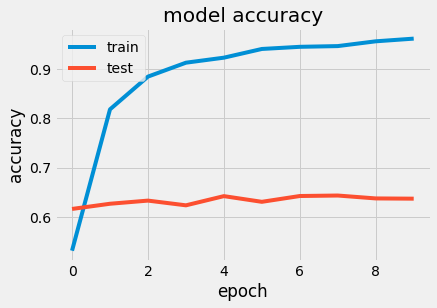

In [26]:
########################################################################################################################
#____________________________________________________________Accuracy Plot Of the MOdel___________________________________#
########################################################################################################################

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

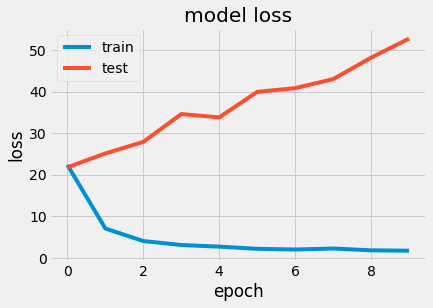

In [28]:
########################################################################################################################
#____________________________________________________________Loss Plot Of the Model___________________________________#
########################################################################################################################

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**VGG-16**

In [29]:
# Create a VGG16 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #Training with Imagenet weights


# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(len(freq_train), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes

#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                            

In [30]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')

In [31]:
#Compile the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
hist = model.fit(X_train, train_encoded, validation_data=(X_test, test_encoded), epochs=10, batch_size=32, verbose=1, callbacks=[checkpoint,early])

Epoch 1/10
510/510 [==============================] - ETA: 0s - loss: 24.6783 - accuracy: 0.5256
Epoch 00001: val_accuracy improved from -inf to 0.60765, saving model to vgg16_1.h5
510/510 [==============================] - 136s 266ms/step - loss: 24.6783 - accuracy: 0.5256 - val_loss: 24.5124 - val_accuracy: 0.6077
Epoch 2/10
510/510 [==============================] - ETA: 0s - loss: 7.4451 - accuracy: 0.8245
Epoch 00002: val_accuracy improved from 0.60765 to 0.61550, saving model to vgg16_1.h5
510/510 [==============================] - 115s 226ms/step - loss: 7.4451 - accuracy: 0.8245 - val_loss: 28.9301 - val_accuracy: 0.6155
Epoch 3/10
510/510 [==============================] - ETA: 0s - loss: 4.0717 - accuracy: 0.8911
Epoch 00003: val_accuracy improved from 0.61550 to 0.62040, saving model to vgg16_1.h5
510/510 [==============================] - 115s 226ms/step - loss: 4.0717 - accuracy: 0.8911 - val_loss: 33.4031 - val_accuracy: 0.6204
Epoch 4/10
510/510 [========================

In [33]:
# ########################################################################################################################
# #____________________________________________________________Saving The Model___________________________________#
# ########################################################################################################################

model.save("/content/drive/MyDrive/SEM3/CGAS/Project/CGAS_FoodCategorization/vgg16_model.pb")
accuracy = model.evaluate(x=X_test,y=test_encoded,batch_size=256)
print("Test loss:",accuracy[0])
print("Test accuracy: ",accuracy[1])

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SEM3/CGAS/Project/CGAS_FoodCategorization/vgg16_model.pb/assets
16/16 [==============================] - 22s 1s/step - loss: 54.5612 - accuracy: 0.6557
Test loss: 54.56122589111328
Test accuracy:  0.6557135581970215


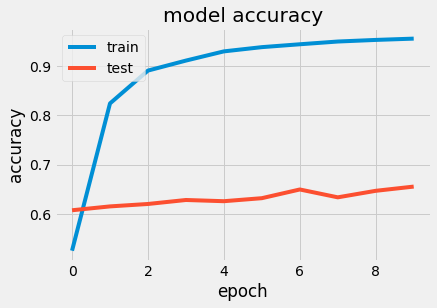

In [34]:
########################################################################################################################
#____________________________________________________________Accuracy Plot Of the MOdel___________________________________#
########################################################################################################################

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

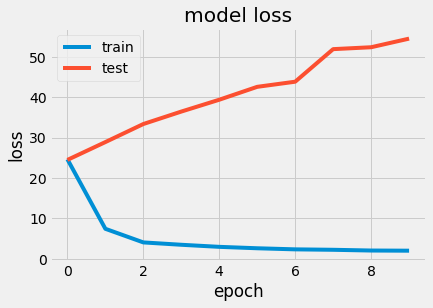

In [35]:
########################################################################################################################
#____________________________________________________________Loss Plot Of the Model___________________________________#
########################################################################################################################

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()